### Extract Resting State and Tapping Period

In [2]:
# Perform required imports
import os
import PyQt5
import mne
import matplotlib.pyplot as plt
import numpy as np
from mne.preprocessing import ICA
import sklearn
from mne.time_frequency import psd_array_welch
%matplotlib qt


In [3]:
# Load Data From Participant
participant_id = 'P03'


data = mne.io.read_raw_fif(f'{participant_id}_cleaned_EEG.fif', preload=True)


Opening raw data file P03_cleaned_EEG.fif...


C:\Users\ymijs\AppData\Local\Temp\ipykernel_18564\3489660997.py:5: RuntimeWarning: This filename (P03_cleaned_EEG.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  data = mne.io.read_raw_fif(f'{participant_id}_cleaned_EEG.fif', preload=True)


    Range : 0 ... 8253999 =      0.000 ...  8253.999 secs
Ready.
Opening raw data file c:\Users\ymijs\OneDrive\Documents\Internship\Apathy-Agency\EEG Experiment\Data Analysis\P03_cleaned_EEG-1.fif...
    Range : 8254000 ... 8430311 =   8254.000 ...  8430.311 secs
Ready.
Reading 0 ... 8430311  =      0.000 ...  8430.311 secs...


Using matplotlib as 2D backend.


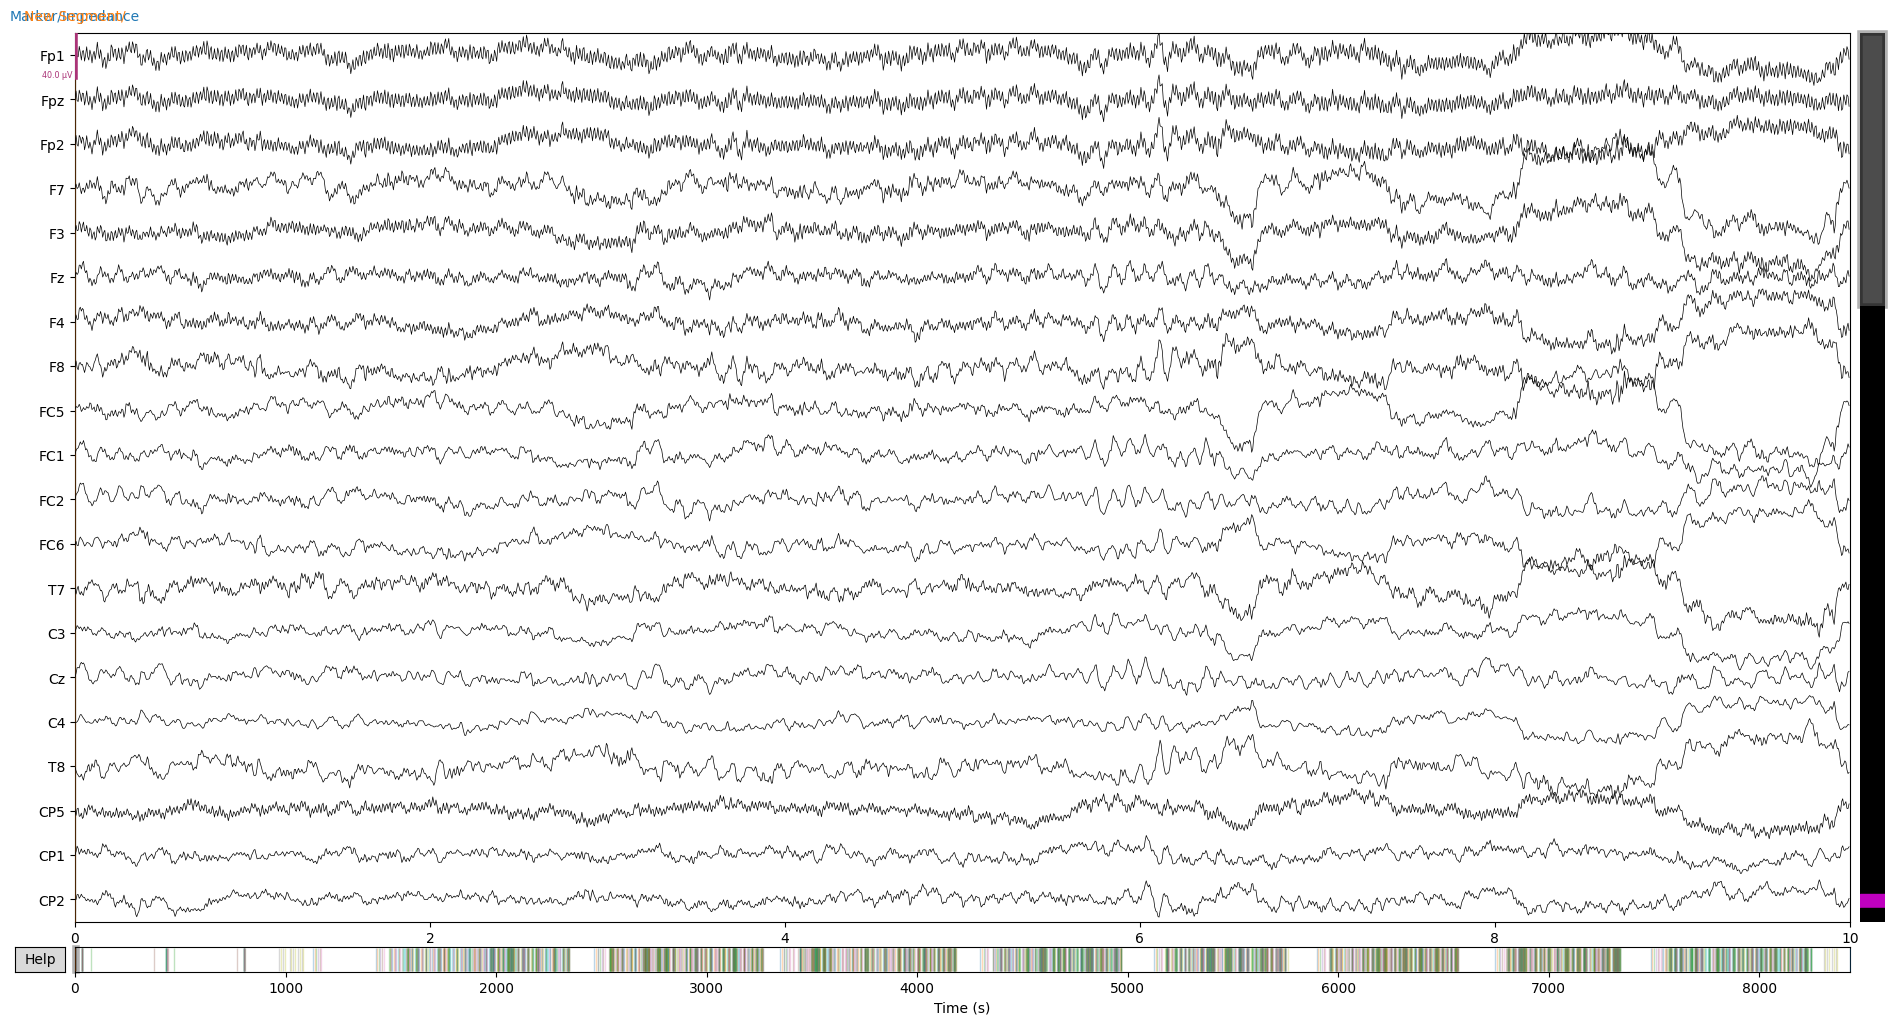

In [7]:
data.plot()


In [4]:
# Crop the data to the resting state time window

# Start with a more "general" cut to get a braoder area, this is to prevent finding other events with the same code
rs1_start = 74
rs1_finish = 380

resting_state_area = data.copy().crop(tmin=rs1_start, tmax=rs1_finish)

# Transform the annotations in the data (coming from the triggers) to actual events
resting_state_events, resting_state_event_id = mne.events_from_annotations(resting_state_area)

# Inspect the events
print(resting_state_events)

# Extract the resting state segment
start_sample = resting_state_events[0, 0]    # End sample from 's0'
print(start_sample)
end_sample = resting_state_events[1, 0]    # End sample from 's255'
print(end_sample)
# Create a new dataset with only the resting state data
resting_state = data.copy().crop(tmin=start_sample / data.info['sfreq'], tmax=end_sample / raw.info['sfreq'])
print(resting_state.get_data().shape)


Used Annotations descriptions: [np.str_('Stimulus/s1'), np.str_('Stimulus/s255')]
[[ 75618      0      1]
 [375627      0      2]]
75618
375627
(65, 300010)


In [5]:
# Crop the data to the resting state time window
rs2_start = 470
rs2_finish = 780

# Start with a more "general" cut to get a braoder area, this is to prevent finding other events with the same code
resting_state_area_2 = data.copy().crop(tmin=rs2_start, tmax=rs2_finish)

# Transform the annotations in the data (coming from the triggers) to actual events
resting_state_events_2, resting_state_event_id_2 = mne.events_from_annotations(resting_state_area_2)

# Inspect the events
print(resting_state_events_2)

# Extract the resting state segment
start_sample_2 = resting_state_events_2[0, 0]  # Start sample from 's1'
end_sample_2 = resting_state_events_2[1, 0]    # End sample from 's255'

# Create a new dataset with only the resting state data
resting_state_2 = data.copy().crop(tmin=start_sample_2 / data.info['sfreq'], 
                                    tmax=end_sample_2 / data.info['sfreq'])


Used Annotations descriptions: [np.str_('Stimulus/s1'), np.str_('Stimulus/s255')]
[[471595      0      1]
 [771604      0      2]]


In [6]:
# Divide the resting state data into 10s epochs

# Create epochs from the resting state segment
tmin = 0  # Start of each epoch
tmax = 10  # Duration of each epoch in seconds
resting_epochs = mne.make_fixed_length_epochs(resting_state, duration=tmax, preload=True)
resting_epochs_2 = mne.make_fixed_length_epochs(resting_state_2, duration=tmax, preload=True)

# Visualize the epochs
#resting_epochs.plot()
print(resting_epochs.get_data().shape)
print(resting_epochs_2.get_data().shape)

resting_epochs.save(f'{participant_id}_resting-1-epo.fif', overwrite=True)
resting_epochs_2.save(f'{participant_id}_resting-2-epo.fif', overwrite=True)



Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 30 events and 10000 original time points ...
0 bad epochs dropped
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 30 events and 10000 original time points ...
0 bad epochs dropped
(30, 65, 10000)
(30, 65, 10000)


In [8]:
# Crop the data to the resting state time window
tap_start = 1480
tap_finish = 8260
# Start with a more "general" cut to get a braoder area, this is to prevent finding other events with the same code
tapping_area = data.copy().crop(tmin=tap_start, tmax=tap_finish)

# Extract the key events
tapping_events, tapping_events_id = mne.events_from_annotations(tapping_area)


Used Annotations descriptions: [np.str_('Stimulus/s1'), np.str_('Stimulus/s10'), np.str_('Stimulus/s106'), np.str_('Stimulus/s107'), np.str_('Stimulus/s108'), np.str_('Stimulus/s109'), np.str_('Stimulus/s11'), np.str_('Stimulus/s110'), np.str_('Stimulus/s111'), np.str_('Stimulus/s114'), np.str_('Stimulus/s115'), np.str_('Stimulus/s116'), np.str_('Stimulus/s117'), np.str_('Stimulus/s118'), np.str_('Stimulus/s119'), np.str_('Stimulus/s12'), np.str_('Stimulus/s122'), np.str_('Stimulus/s123'), np.str_('Stimulus/s124'), np.str_('Stimulus/s125'), np.str_('Stimulus/s126'), np.str_('Stimulus/s127'), np.str_('Stimulus/s13'), np.str_('Stimulus/s130'), np.str_('Stimulus/s131'), np.str_('Stimulus/s132'), np.str_('Stimulus/s133'), np.str_('Stimulus/s134'), np.str_('Stimulus/s135'), np.str_('Stimulus/s14'), np.str_('Stimulus/s15'), np.str_('Stimulus/s162'), np.str_('Stimulus/s163'), np.str_('Stimulus/s164'), np.str_('Stimulus/s165'), np.str_('Stimulus/s166'), np.str_('Stimulus/s167'), np.str_('Stimu

In [9]:
# What follows here is a slightly more complex analysis of the different stimuli codes to identify the start and end of specific tapping events 

# First map each event ID to its relevant binary code (in int)
event_id_to_binary = {
    code: int(desc.split('/s')[-1]) for desc, code in tapping_events_id.items() if 'Stimulus/s' in desc
}

# Identify start and end of tapping events, marked by a 64 bit exclusion and a 1 bit on or off for start or end
def is_tapping_start(binary_val):
    return (binary_val & 128 == 0) and (binary_val & 64 == 0) and (binary_val & 1 == 0)

def is_tapping_end(binary_val):
    return (binary_val & 128 == 0) and (binary_val & 64 == 0) and (binary_val & 1 == 1)

def match_previous_event_as_start(end_events, all_events):
    matched_events = []

    # Iterate through the end events
    for i, end in enumerate(end_events):
        # Ensure we are not at the start of the list (i.e., there is a previous event)
        if i > 0:
            # The start event is the event right before the current end event
            start = all_events[all_events.tolist().index(end.tolist()) - 1]
            matched_events.append((start, end))

    return matched_events


# Store starting and ending events
tapping_end_events = []
tapping_start_events = []

for event in tapping_events:  # Iterate over all events
    event_code = event[2]
    if event_code in event_id_to_binary:  # Only process stimulus events
        binary_val = event_id_to_binary[event_code]
        if is_tapping_end(binary_val):
            tapping_end_events.append(event)

for event in tapping_events:  # Iterate over all events
    event_code = event[2]
    if event_code in event_id_to_binary:  # Only process stimulus events
        binary_val = event_id_to_binary[event_code]
        if is_tapping_start(binary_val):
            tapping_start_events.append(event)

print(len(tapping_end_events))
print(len(tapping_start_events))

all_tapping_pairs = match_previous_event_as_start(tapping_end_events, tapping_events)

print(len(all_tapping_pairs))

# Function to filter out the start events that do not exist in tapping_start_events
def get_non_matching_start_events(all_tapping_pairs, tapping_start_events):
    non_matching_start_events = []

    # Extract the event codes from tapping_start_events for comparison
    start_event_codes = {event[2] for event in tapping_start_events}  # Assuming event[2] is the event code
    
    # Iterate over all the tapping pairs
    for start, end in all_tapping_pairs:
        # Compare only the event code (start[2]) instead of the entire event
        if start[2] not in start_event_codes:
            non_matching_start_events.append((start, end))

    return non_matching_start_events

# Get all the pairs of events (start, end) as previously done
all_tapping_pairs = match_previous_event_as_start(tapping_end_events, tapping_events)

# Get the non-matching start events
non_matching_start_events = get_non_matching_start_events(all_tapping_pairs, tapping_start_events)



# As there is a mismatch between starting and ending events we will look for end events that happen within 7.5 seconds after the start of the tapping event and pair the first end event in that timeframe with the starting event
def match_start_end_events(all_tapping_pairs, time_window=8):
    matched_events = []

    for start, end in all_tapping_pairs:
        start_time = start[0] / tapping_area.info['sfreq']  # Convert sample index to time in seconds
        # Search for the end event within 8 seconds after the start event
        end_time = end[0] / data.info['sfreq']  # Convert sample index to time in seconds
        if start_time < end_time <= (start_time + time_window):
            matched_events.append((start, end))
            break  # Once we find the first matching end, we move to the next start event

    return matched_events

#all_tapping_pairs_matched = match_start_end_events(all_tapping_pairs, time_window=8)

#print(len(all_tapping_pairs_matched))

# Calculate the duration of each tapping pair (end time - start time)
tapping_durations = np.array([end[0] - start[0] for start, end in all_tapping_pairs])
# Filter out tapping pairs with a duration less than 7 seconds (assuming the sampling rate is known, e.g., 1000 Hz)
# If the sampling rate is 1000 Hz, 7 seconds would correspond to 7000 samples. 
# Adding a 200ms boundary because the timing of the triggers is not perfect and the there might be a ms-level difference between start and end that make it less than 7 seconds
min_duration_samples = 7 * 1000 - 200 # adjust this based on your actual sampling rate
valid_tapping_indices = tapping_durations >= min_duration_samples
# Now we filter the tapping pairs to include only the valid ones
valid_tapping_pairs = np.array(all_tapping_pairs)[valid_tapping_indices]

print(len(valid_tapping_pairs))


857
521
856
213


In [12]:
# Now divide the tapping events into 10s filters starting at event -1s and ending at event +2 seconds
valid_tapping_pairs_start = np.array([start for start, end in valid_tapping_pairs])

print(len(valid_tapping_pairs_start))
# Starting time of epoch is 1 second before tapping
tmin= -5

# End time of epoch is 2 seconds after end (or 9 seconds after start)
tmax= 9

tapping_epochs_readiness = mne.Epochs(
    tapping_area,  # The raw EEG data object
    valid_tapping_pairs_start,  # Your events (need to be in the format [index, id, time])
    event_id=None,  # You can use a specific event id if needed, or just pass None
    tmin=tmin,  # Start time relative to event (in seconds)
    tmax=tmax,  # End time relative to event (in seconds)
    baseline=None,  # No baseline correction for now
    picks='all',  # Pick all channels
)

tapping_epochs_readiness.save(f'{participant_id}_tapping-readiness-pot-epo.fif', overwrite=True)


213
Not setting metadata
213 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 213 events and 14001 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 1 events and 14001 original time points ...
Using data from preloaded Raw for 213 events and 14001 original time points ...


Channels marked as bad:
none
